# 1.Dataset Collections

#### import libraries

In [2]:
import cv2 as cv
import numpy as np
import os
from PIL import Image

## Create the directory structure

In [3]:
if not os.path.exists("data"):
    os.makedirs("data/train")
    os.makedirs("data/train/01_palm")
    os.makedirs("data/train/02_fist")
    os.makedirs("data/train/03_thumbs-up")
    os.makedirs("data/train/04_thumbs-down")
    os.makedirs("data/train/05_index-right")
    os.makedirs("data/train/06_index-left")
    os.makedirs("data/train/07_no-gesture")
    os.makedirs("data/test")
    os.makedirs("data/test/01_palm")
    os.makedirs("data/test/02_fist")
    os.makedirs("data/test/03_thumbs-up")
    os.makedirs("data/test/04_thumbs-down")
    os.makedirs("data/test/05_index-right")
    os.makedirs("data/test/06_index-left")
    os.makedirs("data/test/07_no-gesture")

In [4]:
os.listdir('data')

['test', 'train']

In [5]:
os.listdir('data/train')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

In [6]:
os.listdir('data/test')

['01_palm',
 '02_fist',
 '03_thumbs-up',
 '04_thumbs-down',
 '05_index-right',
 '06_index-left',
 '07_no-gesture']

## Enter Mode - Train or Test

In [7]:
print('Enter mode:')
mode = input()

Enter mode:
test


In [8]:
if mode == 'train':   
    direct = 'data/'+mode+'/'
else:
    direct = 'data/'+mode+'/'

## Capture images for Dataset

In [12]:
cap = cv.VideoCapture(0)

while True:
    _, frame = cap.read()
    # Simulating mirror image
    frame = cv.flip(frame, 1)

    # Getting count of existing images
    count = {'palm': len(os.listdir(direct+"/01_palm")),
             'fist': len(os.listdir(direct+"/02_fist")),
             'thumbs-up': len(os.listdir(direct+"/03_thumbs-up")),
             'thumbs-down': len(os.listdir(direct+"/04_thumbs-down")),
             'index-right': len(os.listdir(direct+"/05_index-right")),
             'index-left': len(os.listdir(direct+"/06_index-left")),
             'no-gesture': len(os.listdir(direct+"/07_no-gesture")),
            }
    # Printing the count in each set to the screen
    cv.putText(frame, "MODE: "+mode, (10, 50),cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "IMAGE COUNT:", (10, 100), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "Raised Hand(0):"+str(count['palm']), (10, 150), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "Raised Fist(1):"+str(count['fist']), (10, 200), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "Thumbs-Up(2):"+str(count['thumbs-up']), (10, 250), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "Thumbs-Down(3):"+str(count['thumbs-down']), (10, 300), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "Index Pointing Right (4):"+str(count['index-right']), (10, 350), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "Index Pointing Left(5):"+str(count['index-left']), (10, 400), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)
    cv.putText(frame, "No gesture(6):"+str(count['no-gesture']), (10, 450), cv.FONT_HERSHEY_COMPLEX_SMALL, 1, (255,0,0), 1)

    x1 = int(0.5*frame.shape[1])
    y1 = 10
    x2 = frame.shape[1]-10
    y2 = int(0.5*frame.shape[1])
    # Drawing the ROI
    # The increment/decrement by 1 is to compensate for the bounding box
    cv.rectangle(frame, (x1-1, y1-1), (x2+1, y2+1), (255,0,0),3)
    # Extracting the ROI
    roi = frame[y1:y2, x1:x2]
    roi = cv.resize(roi, (120, 120))

    cv.imshow("Collecting data", frame)
    # do the processing after capturing the image!
    roi = cv.cvtColor(roi, cv.COLOR_BGR2GRAY)
    _, roi = cv.threshold(roi, 130, 255, cv.THRESH_BINARY)
    cv.imshow("ROI", roi)

    interrupt = cv.waitKey(10)
    
    if interrupt & 0xFF == 27: # esc key
        break
    if interrupt & 0xFF == ord('0'):
        cv.imwrite(direct+'01_palm/'+str(count['palm'])+'.jpg', roi)
    if interrupt & 0xFF == ord('1'):
        cv.imwrite(direct+'02_fist/'+str(count['fist'])+'.jpg', roi)
    if interrupt & 0xFF == ord('2'):
        cv.imwrite(direct+'03_thumbs-up/'+str(count['thumbs-up'])+'.jpg', roi)
    if interrupt & 0xFF == ord('3'):
        cv.imwrite(direct+'04_thumbs-down/'+str(count['thumbs-down'])+'.jpg', roi)
    if interrupt & 0xFF == ord('4'):
        cv.imwrite(direct+'05_index-right/'+str(count['index-right'])+'.jpg', roi)
    if interrupt & 0xFF == ord('5'):
        cv.imwrite(direct+'06_index-left/'+str(count['index-left'])+'.jpg', roi)
    if interrupt & 0xFF == ord('6'):
        cv.imwrite(direct+'07_no-gesture/'+str(count['no-gesture'])+'.jpg', roi)



cap.release()
cv.destroyAllWindows()

## Gestures in Dataset

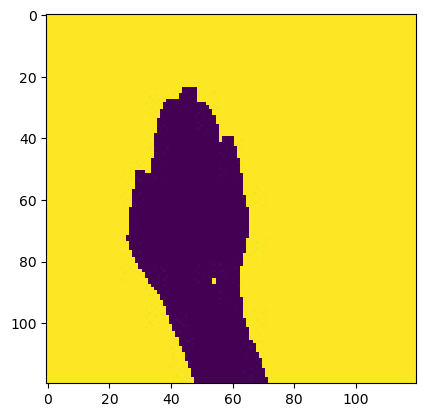

In [13]:
image = Image.open('data\\train\\01_palm\\01_palm_20.jpg')
plt.imshow(image)

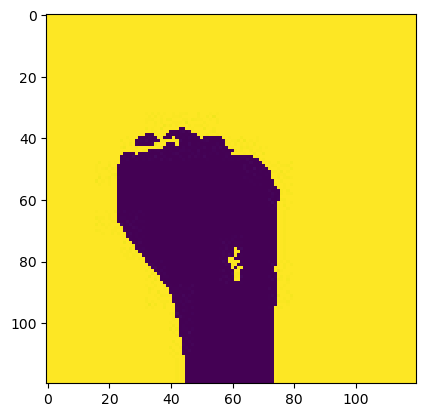

In [14]:
image = Image.open('data\\train\\02_fist\\02_fist_0.jpg')
plt.imshow(image)

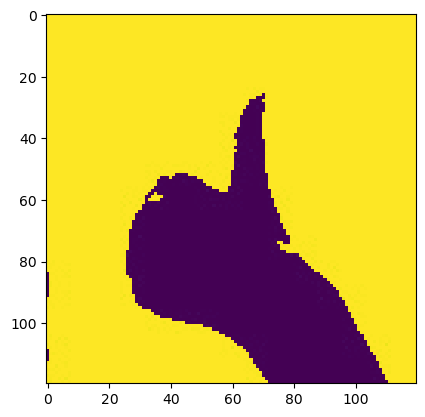

In [15]:
image = Image.open('data\\train\\03_thumbs-up\\03_thumbs-up_0.jpg')
plt.imshow(image)

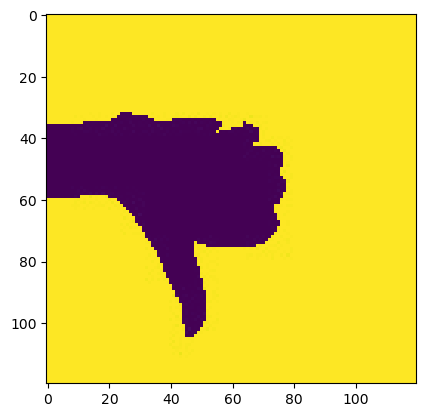

In [16]:
image = Image.open('data\\train\\04_thumbs-down\\04_thumbs-down_0.jpg')
plt.imshow(image)

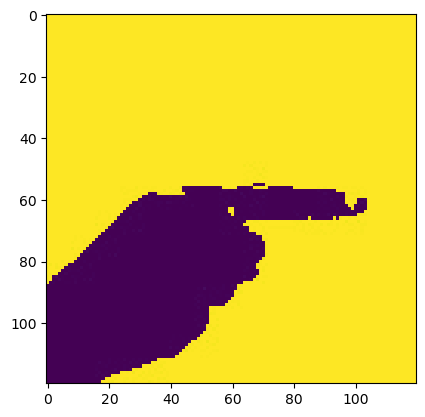

In [17]:
image = Image.open('data\\train\\05_index-right\\05_index-right_0.jpg')
plt.imshow(image)

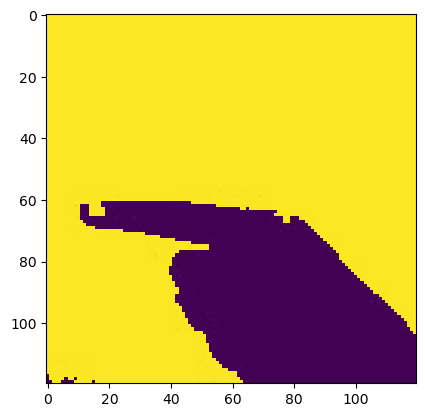

In [18]:
image = Image.open('data\\train\\06_index-left\\06_index-left_0.jpg')
plt.imshow(image)

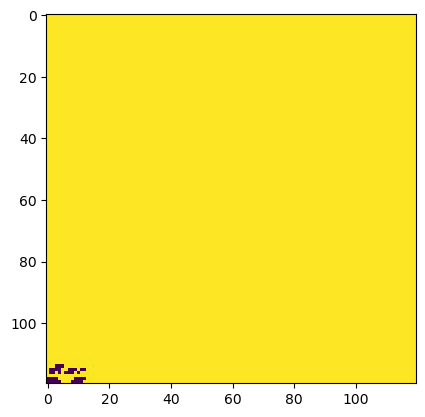

In [19]:
image = Image.open('data\\train\\07_no-gesture\\07_no-gesture_0.jpg')
plt.imshow(image)

# 2.Training CNN model

## Import of keras model and hidden layers for our convolutional network

In [20]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

## Building the CNN

In [21]:
# Step 1 - Building the CNN

# Initializing the CNN
cnn_model = Sequential()

# First convolution layer and pooling
cnn_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(120, 120, 1)))
cnn_model.add(MaxPooling2D((2, 2)))

# Second convolution layer and pooling
cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D((2, 2)))

# Third convolution layer
cnn_model.add(Conv2D(128, (3, 3), activation='relu'))

# input_shape is going to be the pooled feature maps from the previous convolution layer
cnn_model.add(MaxPooling2D((2, 2)))
# Flattening the layers
cnn_model.add(Flatten())

# Adding a fully connected layer
cnn_model.add(Dense(256, activation='relu'))
cnn_model.add(Dense(7, activation='softmax'))

In [22]:
# Compiling the CNN
cnn_model.compile(optimizer='adam', # Optimization routine, which tells the computer how to adjust the parameter values to minimize the loss function.
              loss='categorical_crossentropy', # Loss function, which tells us how bad our predictions are.
              metrics=['accuracy']) # List of metrics to be evaluated by the model during training and testing.

### Preparing the train/test data and training the model

In [23]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=False)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/train',
                                                 target_size=(120, 120),
                                                 batch_size=7,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory('data/test',
                                            target_size=(120, 120),
                                            batch_size=7,
                                            color_mode='grayscale',
                                            class_mode='categorical')

Found 560 images belonging to 7 classes.
Found 240 images belonging to 7 classes.


In [25]:
history=cnn_model.fit(
        training_set,
        steps_per_epoch=80, # No of images in training set
        epochs=7,
        validation_data=test_set,
        validation_steps=50) # No of images in test set

Epoch 1/7
80/80 [==============================] - 66s 825ms/step - loss: 2.0815e-05 - accuracy: 1.0000 - val_loss: 1.0423e-05 - val_accuracy: 1.0000
Epoch 2/7
80/80 [==============================] - 59s 744ms/step - loss: 1.3397e-05 - accuracy: 1.0000
Epoch 3/7
80/80 [==============================] - 64s 796ms/step - loss: 2.7143e-05 - accuracy: 1.0000
Epoch 4/7
80/80 [==============================] - 60s 745ms/step - loss: 6.1892e-06 - accuracy: 1.0000
Epoch 5/7
80/80 [==============================] - 62s 775ms/step - loss: 8.6856e-06 - accuracy: 1.0000
Epoch 6/7
80/80 [==============================] - 62s 772ms/step - loss: 1.1016e-05 - accuracy: 1.0000
Epoch 7/7
80/80 [==============================] - 60s 748ms/step - loss: 5.5334e-06 - accuracy: 1.0000


## Train accuracy

In [26]:
train_loss, train_acc = cnn_model.evaluate(training_set)

print('Train accuracy: {:2.2f}%'.format(train_acc*100))

80/80 [==============================] - 11s 140ms/step - loss: 4.7941e-06 - accuracy: 1.0000
Train accuracy: 100.00%


## Test accuracy

In [27]:
test_loss, test_acc = cnn_model.evaluate(test_set)

print('Test accuracy: {:2.2f}%'.format(test_acc*100))

35/35 [==============================] - 6s 157ms/step - loss: 3.3438e-06 - accuracy: 1.0000
Test accuracy: 100.00%


## Save entire model 

In [28]:
cnn_model.save('handrecognition_model','wb')
cnn_model.summary()

INFO:tensorflow:Assets written to: handrecognition_model\assets


INFO:tensorflow:Assets written to: handrecognition_model\assets


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 59, 59, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 128)       0

### Saving the model weights

In [29]:
model_json = cnn_model.to_json()
with open("gesture-model.json", "w") as json_file:
    json_file.write(model_json)
cnn_model.save_weights('gesture-model')